In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('crime.csv')

In [3]:
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [4]:
data.OFFENSE_TYPE_ID.nunique()

201

In [5]:
data.PRECINCT_ID.value_counts()

611    34456
311    23224
123    20335
412    19565
612    19540
122    18287
623    17337
621    17055
223    16439
312    15921
211    15230
512    15128
313    14912
323    14608
111    14088
113    13940
622    13854
521    13757
423    13718
421    13236
322    13131
411    12718
422    12700
121    12440
212    11419
324    11267
221    11094
321    10715
213    10479
112    10376
511    10301
222     9898
314     8737
522     6758
523     5907
759     5889
Name: PRECINCT_ID, dtype: int64

In [28]:
data.NEIGHBORHOOD_ID.value_counts()

five-points                   26674
stapleton                     21876
cbd                           18863
capitol-hill                  17535
montbello                     17305
baker                         13937
lincoln-park                  13651
east-colfax                   13279
westwood                      12508
civic-center                  12169
union-station                 11939
gateway-green-valley-ranch    10896
west-colfax                   10368
north-capitol-hill             9352
highland                       9190
northeast-park-hill            8999
hampden-south                  8832
hampden                        8092
speer                          7850
globeville                     7848
dia                            7714
elyria-swansea                 7653
cheesman-park                  7481
washington-virginia-vale       7373
athmar-park                    7234
mar-lee                        7196
villa-park                     7151
college-view-south-platte   

In [7]:
data.FIRST_OCCURRENCE_DATE = pd.to_datetime(data.FIRST_OCCURRENCE_DATE)
data["YEAR"] = data.FIRST_OCCURRENCE_DATE.dt.year
data["DAY"] = data.FIRST_OCCURRENCE_DATE.dt.day
data["DAY_OF_WEEK"] = data.FIRST_OCCURRENCE_DATE.dt.dayofweek
data["MONTH"] = data.FIRST_OCCURRENCE_DATE.dt.month
data["HOUR"] = data.FIRST_OCCURRENCE_DATE.dt.hour
data.index = pd.DatetimeIndex(data["FIRST_OCCURRENCE_DATE"])

In [26]:
data.head(10)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20
2018-01-31 00:44:00,201872837,201872837549900,5499,0,traf-other,all-other-crimes,2018-01-31 00:44:00,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,...,6,622,city-park-west,1,0,2018,31,2,1,0
2017-06-01 12:15:00,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,...,1,122,villa-park,1,0,2017,1,3,6,12
2018-01-30 07:40:00,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,2018-01-30 07:40:00,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,...,3,311,speer,1,0,2018,30,1,1,7
2018-01-30 09:10:00,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,2018-01-30 09:10:00,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,...,6,611,civic-center,0,1,2018,30,1,1,9


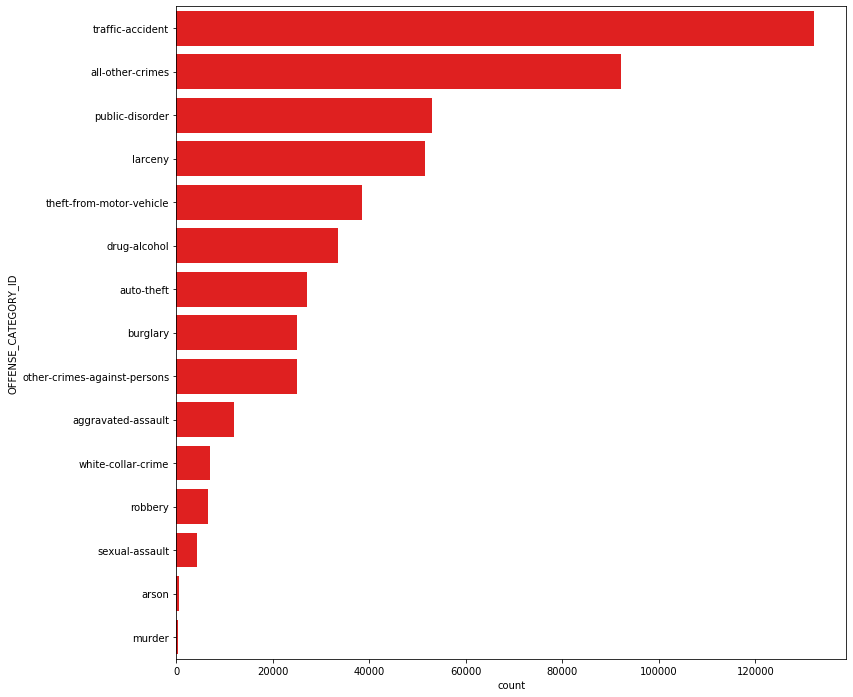

In [9]:
#Number of incidents of each crime
plt.figure(figsize=(12,12))
crime_freq = data.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=data, order=crime_freq.index, color="r")

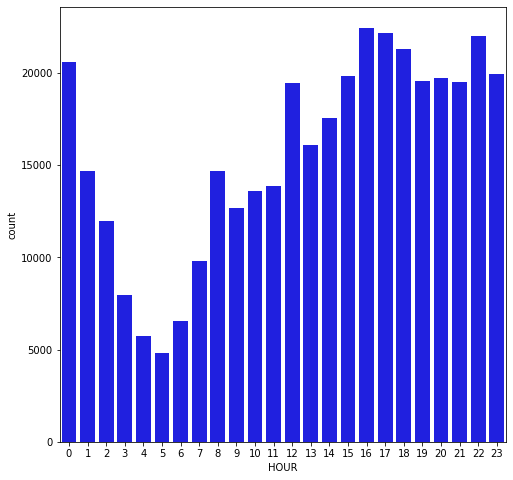

In [10]:
#Incidents of Crime by Hour
plt.figure(figsize=(8,8))
sns.countplot(x="HOUR", data=data[data.IS_CRIME==1], color='b')

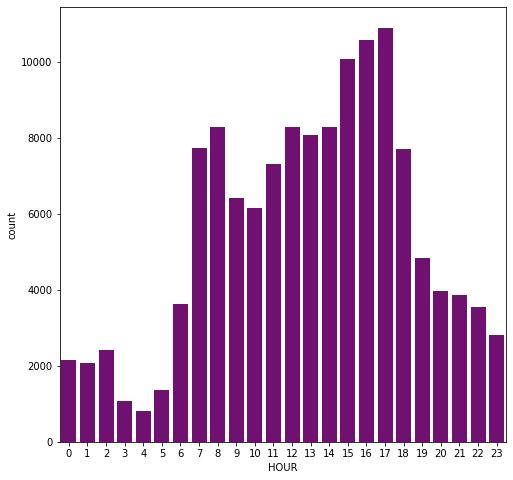

In [11]:
#Incidents of Traffic Crime by Hour
plt.figure(figsize=(8,8))
sns.countplot(x="HOUR", data=data[data.IS_TRAFFIC==1], color='purple')

Text(0.5, 1.0, 'Trend of crimes(by month)')

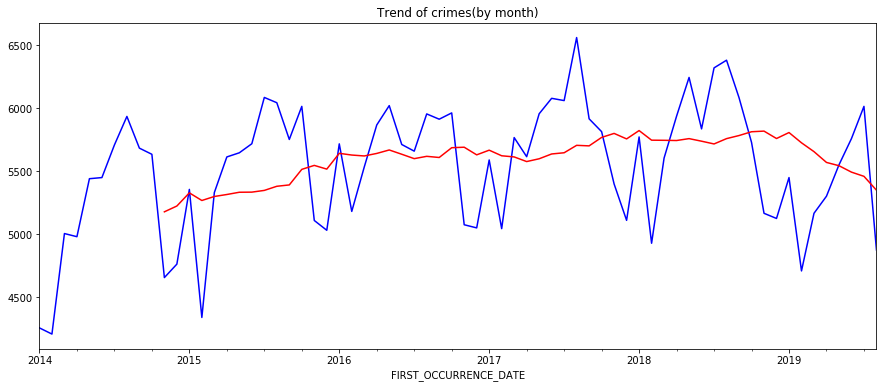

In [12]:
crimes_df = data[data.IS_CRIME==1]
month_df = crimes_df.resample('M').size() #M = month end frequency
plt.figure(figsize=(15,6))
month_df.plot(color='blue')
month_df.rolling(window=11).mean().plot(color='red') #window:number of observations used for calculating the statistic.
plt.title('Trend of crimes(by month)')

In [13]:
neighbourhood_freq_d = data.NEIGHBORHOOD_ID.value_counts()[:5].index
neighbourhood_freq_s = data.NEIGHBORHOOD_ID.value_counts()[-5:].index

Text(0.5, 1.0, 'Most dangerous Neighbourhoods')

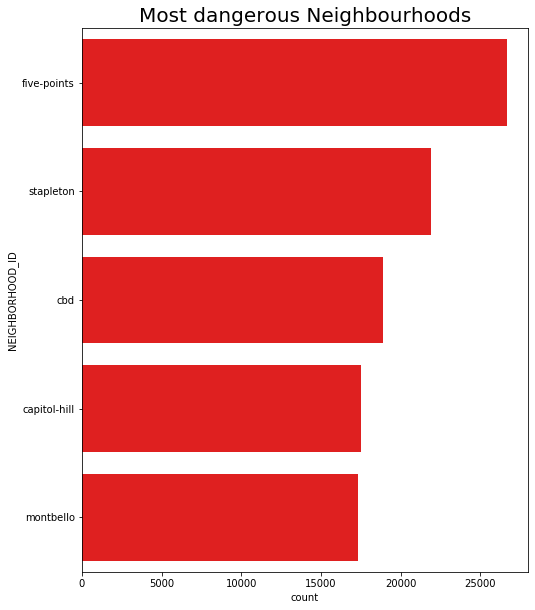

In [14]:
plt.figure(figsize=(8,10))
sns.countplot(y="NEIGHBORHOOD_ID", data=data, order=neighbourhood_freq_d, color="red")
plt.title('Most dangerous Neighbourhoods', fontsize = 20)

Hence five-points is the most dangerous neighbourhood

Text(0.5, 1.0, 'Safest Neighbourhoods')

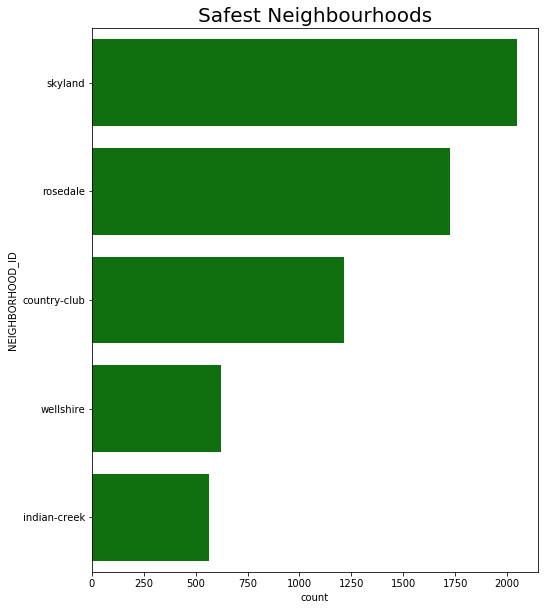

In [15]:
plt.figure(figsize=(8,10))
sns.countplot(y="NEIGHBORHOOD_ID", data=data, order=neighbourhood_freq_s, color="green")
plt.title('Safest Neighbourhoods', fontsize = 20)

Hence Indian Creek is the safest neighbourhood

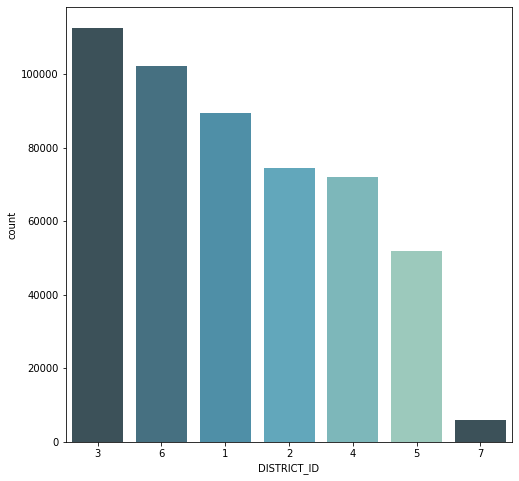

In [16]:
#Crimes reported in each District
p = sns.color_palette("GnBu_d")
plt.figure(figsize=(8,8))
sns.countplot(x="DISTRICT_ID", data=data, order=data.DISTRICT_ID.value_counts().index, palette=p)

In [17]:
data.PRECINCT_ID.value_counts()

611    34456
311    23224
123    20335
412    19565
612    19540
122    18287
623    17337
621    17055
223    16439
312    15921
211    15230
512    15128
313    14912
323    14608
111    14088
113    13940
622    13854
521    13757
423    13718
421    13236
322    13131
411    12718
422    12700
121    12440
212    11419
324    11267
221    11094
321    10715
213    10479
112    10376
511    10301
222     9898
314     8737
522     6758
523     5907
759     5889
Name: PRECINCT_ID, dtype: int64

Text(0.5, 1.0, 'Most dangerous Precincts')

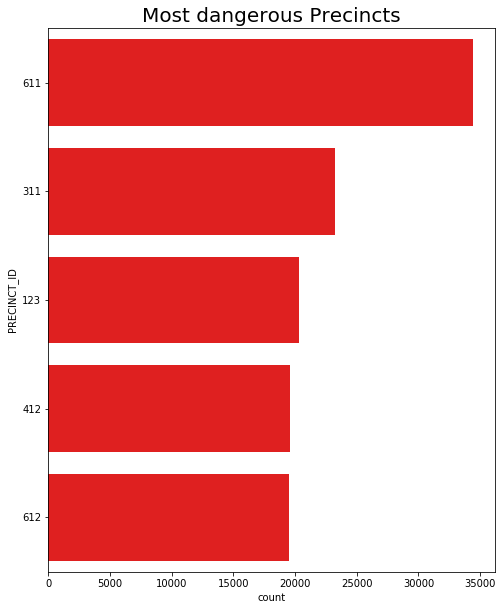

In [25]:
plt.figure(figsize=(8,10))
sns.countplot(y="PRECINCT_ID", data=data, order=data.PRECINCT_ID.value_counts()[:5].index, color="red")
plt.title('Most dangerous Precincts', fontsize = 20)

Text(0.5, 1.0, 'Safest Precincts')

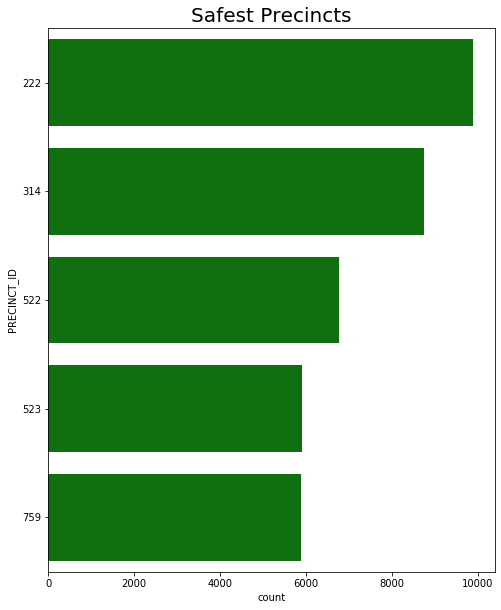

In [24]:
plt.figure(figsize=(8,10))
sns.countplot(y="PRECINCT_ID", data=data, order=data.PRECINCT_ID.value_counts()[-5:].index, color="green")
plt.title('Safest Precincts', fontsize = 20)